# Data Analytics YTIP2200, part6 - exercises

Return .ipynb file to Optima Return box **Tue 6th Apr** at latest. Write in comment field which excercised you've done fully/partly. You can also comment which parts are done/missing.

You can write your solutions in new code cells between existing cells.

Don't use for loops etc.


In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.linear_model import LinearRegression
from scipy import stats


# 1a. Query
File http://gpspekka.kapsi.fi/dataanalytics/part6/query.txt has (imaginary) data from survey that supplier has done to its customers (field separator semicolon and decimal searator comma).  

With correlation find what other field affects most on 'general satisfaction'.

Make simple linear regression with that most affecting field and general satisfaction.

Plot 2 plots:
* scatter plot with that most affecting field and general satisfaction
* scatter plot with actual and predicted general satisfaction values 

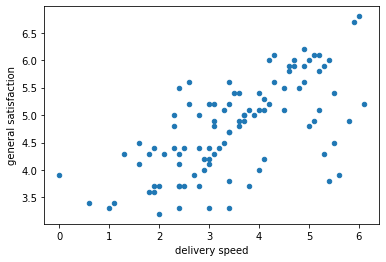

In [63]:
dfq = pd.read_csv('http://gpspekka.kapsi.fi/dataanalytics/part6/query.txt',
                  sep = ';',
                  decimal = ','                
                 )


# Get series of how all fields correlate with the field in question
# take the two largest of them and then second one, as the largest is the field correlating with itself (1.0)
# jotta tämä pätisi yleispätevästi, eikä vain tähän keikkaan, niin pitäisi varmaan ottaa abs, jotta negatiivinen korrelaatiokin tulee huomioitua
dfq.corrwith(dfq['general satisfaction']).nlargest(2)[1]
dfq.corrwith(dfq['general satisfaction'])

# scatter plot with that most affecting field and general satisfaction
dfq.plot.scatter('delivery speed', 'general satisfaction')
plt.show()


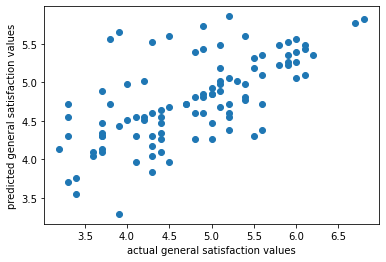

In [98]:
# scatter plot with actual and predicted general satisfaction values 


plt.close()

# linear regression is a linear approach to modelling the relationship between a scalar response and one or more explanatory variables
# creating linear model
model = LinearRegression()

# sets explanatory variable
X = dfq['delivery speed'].to_frame() # as explanatory variable needs to be given as df

# scalar response
Y = dfq['general satisfaction']

# fits them to model
model.fit(X,Y)

# calculate predictions for all actual x-values
pred_y = model.predict(X)

# plot predicted vs. actual y-values
plt.scatter(Y,pred_y)
plt.xlabel('actual general satisfaction values')
plt.ylabel('predicted general satisfaction values')
plt.show()

plt.close()

# print(model.coef_)
# print(model.intercept_)
# regression line (trend line?) y = coef_ * x + intercept_
# print(model.score(X,Y)) #coefficient of determination, eli selitysaste


# 1b. Outliers
File http://gpspekka.kapsi.fi/dataanalytics/part6/outliers.txt has some x and y values.

Make scatter plot and calculate Pearson and Spearman correlation coefficients.

Remove clear outliers and make new scatter plot and calculate new Pearson and Spearman correlation coefficients.

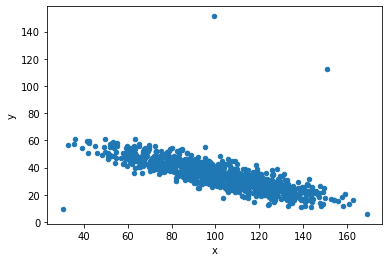

Pearson correlation coefficient
-0.7568049802149978

Spearman correlation coefficient
-0.8448230568230568

-----

After removing outliers, with z-score 3 or higher


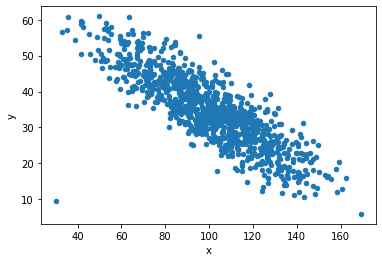

Pearson correlation coefficient
-0.846302176174956

Spearman correlation coefficient
-0.8513808107840706


In [117]:
dfo = pd.read_csv('http://gpspekka.kapsi.fi/dataanalytics/part6/outliers.txt',
                  sep = ','
                 )

# Make scatter plot
dfo.plot.scatter('x', 'y')
plt.show()

print('Pearson correlation coefficient')
print(dfo['x'].corr(dfo['y']))

print('\nSpearman correlation coefficient')
print(dfo['x'].corr(dfo['y'], method='spearman'))

print('\n-----\n')
print('After removing outliers, with z-score 3 or higher')
# removing the outliers
z = np.abs(stats.zscore(dfo))
dfo_without_outliers = dfo[(z < 3).all(axis=1)]


# Make scatter plot
dfo_without_outliers.plot.scatter('x', 'y')
plt.show()

print('Pearson correlation coefficient')
print(dfo_without_outliers['x'].corr(dfo_without_outliers['y']))

print('\nSpearman correlation coefficient')
print(dfo_without_outliers['x'].corr(dfo_without_outliers['y'], method='spearman'))



# dfo.shape
# dfo_without_outliers.shape

# https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
# https://www.statisticshowto.com/probability-and-statistics/z-score/

# 2. Countries
Files http://gpspekka.kapsi.fi/dataanalytics/part6/gdp.txt and http://gpspekka.kapsi.fi/dataanalytics/part6/life.txt  has yearly gross domestic products and life expectancys of countries from 1960.

Calculate Pearson correlation coefficient for each year and plot these yearly coefficients.

Model: 
![model2](http://gpspekka.kapsi.fi/dataanalytics/part6/model2.png)

<ipython-input-172-5683c7c56f85>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().xaxis.label.set_visible(False)


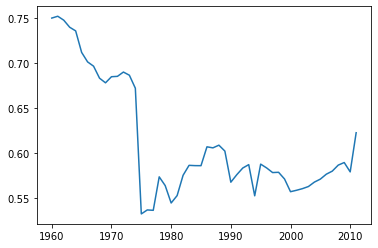

In [172]:
df_gdp = pd.read_csv('http://gpspekka.kapsi.fi/dataanalytics/part6/gdp.txt',
                  sep = ','
                 )

df_life = pd.read_csv('http://gpspekka.kapsi.fi/dataanalytics/part6/life.txt',
                  sep = ','
                 )

# get year correlation of gdp and life expectancy as series
yearly_corr = df_gdp.corrwith(other=df_life)

# convert to df
df_yearly_corr = yearly_corr.to_frame()

# rename correlation column (was unable to refer to it later, when plotting)
df_yearly_corr.rename(columns = {0:'corr'}, inplace=True)

# reset index, so that it will become a column and can be referred to, when plotting
# plot with index and correlation
df_yearly_corr.reset_index().plot(x = 'index', y = 'corr', legend = False)

# Removes xlabel
plt.axes().xaxis.label.set_visible(False)

plt.show()



# 3.  Houses
File http://gpspekka.kapsi.fi/dataanalytics/part6/houses.txt  have (imaginary) data on sold houses. 

Make linear regression model with area, bedrooms and sauna as explanatory variables and price as scalar response.

Define score of the model.

Then calculate scores with linear regression using only two of three explanatory variables (three possibilities).

Take best of these 4 models (based on score) and plot actual and predicted prices.

Score (all): 0.7442335552970589
Score (without sauna): 0.7335822686603743
Score (without bedrooms): 0.742057921659329
Score (without area): 0.25426882030277387


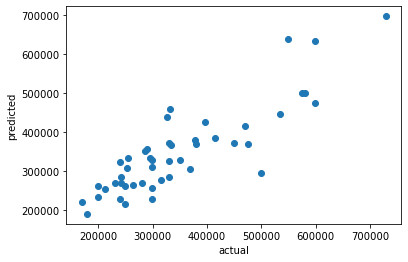

In [187]:
dfh = pd.read_csv('http://gpspekka.kapsi.fi/dataanalytics/part6/houses.txt')

# map numerical values for sauna
dfh['sauna'] = dfh['sauna'].map({'yes':1, 'no':0})

# model with all
X_all = dfh[['area','bedrooms','sauna']]
Y = dfh['price']

model = LinearRegression()
model.fit(X_all,Y)

print('Score (all):', model.score(X_all,Y)) 

# model without sauna
X_area_bed = dfh[['area','bedrooms']]

model = LinearRegression()
model.fit(X_area_bed,Y)

print('Score (without sauna):', model.score(X_area_bed,Y)) 

# model without bedrooms
X_area_sauna = dfh[['area','sauna']]

model = LinearRegression()
model.fit(X_area_sauna,Y)

print('Score (without bedrooms):', model.score(X_area_sauna,Y)) 

# model without area
X_bed_sauna = dfh[['bedrooms','sauna']]

model = LinearRegression()
model.fit(X_bed_sauna,Y)

print('Score (without area):', model.score(X_bed_sauna,Y)) 


# best model
model.fit(X_all,Y)

# calculate predictions for all actual x-values
pred_y = model.predict(X_all)

# plot predicted vs. actual y-values
plt.scatter(Y,pred_y)
plt.xlabel('actual')
plt.ylabel('predicted')
plt.show()

# 4. Gravitational acceleration 
Simple gravity pendulum's period *t<sub>0</sub>* depends on length *l* and gravitational acceleration *g* with formula:  

![gravity](http://gpspekka.kapsi.fi/dataanalytics/part6/gravity.png)

File http://gpspekka.kapsi.fi/dataanalytics/part6/pendulum.txt has measured data of pendulum's lengths and periods. Make linear regression model with square root of lengths and periods and as its slope coefficient define factor   

![gravity](http://gpspekka.kapsi.fi/dataanalytics/part6/gravity2.png)

From that calculate gravitational acceleration g as unit m/s<sup>2</sup>.

Should get: 9.7639... m/s<sup>2</sup> or 9.9237... m/s<sup>2</sup>.

In [220]:
dfp = pd.read_csv('http://gpspekka.kapsi.fi/dataanalytics/part6/pendulum.txt')

# convert to meters
dfp['length (m)'] = dfp['length (cm)'] / 100 

# square root of lengths
dfp['sqrt l'] = np.sqrt(dfp['length (m)'])

# linear regression model with square root of lengths (in meters) and periods
model = LinearRegression()
X = dfp['sqrt l'].to_frame()
Y = dfp['period (s)']

# fit to model
model.fit(X, Y)

# plotting it just to check
# plt.scatter(X,Y)
# plt.show()

# getting the coefficient
c = model.coef_

# c = 2 * pi / sqrt(g) -> pyöräytetään -> 
g = (2 * math.pi / c)**2

print(f'gravitational acceleration {g} m/s2')



gravitational acceleration [9.76391393] m/s2


# 5. Apartments

File http://gpspekka.kapsi.fi/dataanalytics/part6/jkl.txt has data on sold apartments in Jyväskylä for one year. 

Split data to train (60%) and test (40%) data and make linear regression model with train data to predict price with fields:
* m2
* year
* elevator (transform 0/1)
* condition (good/average/poor -> transform numeric)
* new field inCenter which is 1 if district='Keskusta', otherwise 0

Replace missing values with column median.

Test model with test data and plot actual<->predicted values and coefficient of determination (score).

score: 0.5763826592268992


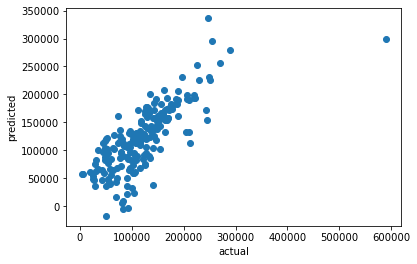

In [244]:
from sklearn.model_selection import train_test_split 

dfa = pd.read_csv('http://gpspekka.kapsi.fi/dataanalytics/part6/jkl.txt')

# map numerical values for elevator
dfa['elevator'] = dfa['elevator'].map({'yes':1, 'no':0})
dfa['condition'] = dfa['condition'].map({'good':2, 'average':1,'poor':0})


# new field inCenter which is 1 if district='Keskusta', otherwise 0
dfa['inCenter'] = dfa['district']
dfa.loc[dfa['district'] == 'Keskusta', 'inCenter'] = 1
dfa.loc[dfa['district'] != 'Keskusta', 'inCenter'] = 0

# filling missing values with column median
median_condition = dfa['condition'].median()

dfa['condition'].fillna(median_condition, inplace = True)

# print(dfa.head())

# setting explanatory variables
X = dfa[['m2', 'year', 'elevator', 'condition', 'inCenter']]

# setting scalar response
Y = dfa['price']

# splitting data to train (60%) and test (40%) data
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = 0.4, random_state = 15) 

#print(xTrain.shape)
#print(xTest.shape) 


model = LinearRegression()

# fit with train set
model.fit(xTrain,yTrain)

# test with model with test data
print('score:', model.score(xTest,yTest)) 


# calculate predictions for all actual x-values
pred_y = model.predict(xTest)

# plot predicted vs. actual y-values
plt.scatter(yTest,pred_y)
plt.xlabel('actual')
plt.ylabel('predicted')
plt.show()


#dfa['condition'].unique()
#dfa.isnull().sum()